In [403]:
#Import packages
#https://www.guggenheiminvestments.com/mutual-funds/resources/crucial-conversations/putting-pullbacks-in-perspective
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from zigzag import *
from IPython.display import display

In [320]:
SP500 = pd.read_excel('S&P_Historical_Data\SP500.xlsx', index_col='Date')
SP500.set_index(pd.to_datetime(SP500.index, format='%b %d, %Y'),inplace=True)
SP500.drop(SP500.columns[[0,1,2,3,5]], axis = 1, inplace=True)
SP500.rename(columns={'Adj Close**':'Close'}, inplace=True)


,Close
Date,
2022-06-24,3911.74
2022-06-23,3795.73
2022-06-22,3759.89
2022-06-21,3764.79
2022-06-17,3674.84
2022-06-16,3666.77
2022-06-15,3789.99
2022-06-14,3735.48
2022-06-13,3749.63


7.695894736842104


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94]),
 [Text(0, 0, '1928'),
  Text(1, 0, '1929'),
  Text(2, 0, '1930'),
  Text(3, 0, '1931'),
  Text(4, 0, '1932'),
  Text(5, 0, '1933'),
  Text(6, 0, '1934'),
  Text(7, 0, '1935'),
  Text(8, 0, '1936'),
  Text(9, 0, '1937'),
  Text(10, 0, '1938'),
  Text(11, 0, '1939'),
  Text(12, 0, '1940'),
  Text(13, 0, '1941'),
  Text(14, 0, '1942'),
  Text(15, 0, '1943'),
  Text(16, 0, '1944'),
  Text(17, 0, '1945'),
  Text(18, 0, '1946'),
  Text(19, 0, '1947'),
  Text(20, 0, '1948'),
  Text(21, 0, '1949'),
  Text(22, 0, '1950'),
  Text(23, 0, '1951'),
  Text(24, 0, '1952'),
  Tex

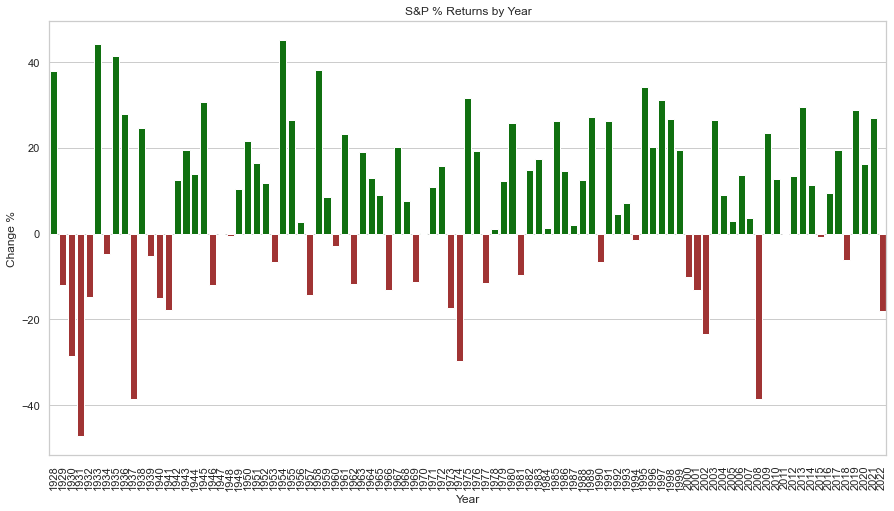

In [451]:
SP500_Yearly = SP500.resample("Y").last().dropna().iloc[::-1]
SP500_Yearly['Change %'] = ((SP500_Yearly['Close'] - SP500_Yearly['Close'].shift(-1) )/SP500_Yearly['Close'].shift(-1)*100).round(decimals=2)
SP500_Yearly = SP500_Yearly[:-1]
SP500_Yearly['Year'] = pd.DatetimeIndex(SP500_Yearly.index).year

print(SP500_Yearly['Change %'].mean())

sns.set(rc = {'figure.figsize':(15,8)})
sns.set_theme(style="whitegrid")

colors = [1 if c >= 0 else 0 for c in SP500_Yearly['Change %']]

ax = sns.barplot(y='Change %', x='Year', hue=colors, palette=(SP500_Yearly['Change %'] > 0).map({True: "Green", False: 'firebrick'}), data = SP500_Yearly, dodge=False).set(title='S&P % Returns by Year')
plt.legend([],[], frameon=False)
plt.xticks(rotation=90)


If you got to this part of the code, let me confess one thing. I spend lots of time trying to figure out a way to get the market corrections algorithmically, I tried every library, logic or mathematical way I could and nothing worked reliably. Searching on forums for the solution, turns out I wasn't the first one to try it out and not the last one to give up on it. Market declines can come with different time frames and different amplitudes and require interpretation that is really hard to put into a formula, the only reason I kept trying to do it was programmer's pride. With the amount of data you have, just by looking at the chart you can identify every market decline in less than a day, and insert the data by hand, so that is what I did.

2 - make a table with the number of declines, decline %, average length of decline and average time of recover

In [452]:
Declines = {
'Start Date':['1929-09-03','1930-04-10','1932-09-07','1933-07-18','1934-02-06','1936-04-06','1937-03-10','1938-10-10','1939-09-12','1940-11-12','1943-07-14','1946-01-29','1946-05-29',
'1947-02-11','1947-07-24','1948-06-15','1950-06-09','1953-01-05','1955-09-23','1956-03-20','1956-08-02','1957-07-15','1960-01-05','1960-08-24','1961-12-12','1962-08-22','1965-05-13',
'1966-02-09','1967-09-25','1968-11-29','1971-04-28','1971-09-08','1973-01-11','1974-11-07','1975-07-15','1976-09-21','1978-09-12','1979-10-05','1980-02-13','1980-11-28','1983-10-10',
'1987-08-25','1990-01-02','1990-07-16','1994-02-02','1997-02-18','1997-10-07','1998-07-17','1999-07-16','2000-03-24','2002-11-27','2004-02-11','2007-10-09','2010-04-23','2011-04-29',
'2011-10-28','2012-04-02','2015-05-21','2015-11-03','2018-01-26','2018-09-20','2020-02-19','2020-09-02','2022-01-03'],
'End Date':['1929-11-13','1932-06-01','1933-02-27','1933-10-19','1935-03-14','1936-04-29','1938-03-31','1939-04-11','1940-06-10','1942-04-28','1943-11-29','1946-02-26','1946-10-09',
'1947-05-20','1948-03-16','1949-06-13','1950-07-17','1953-09-14','1955-10-11','1956-05-28','1957-02-12','1957-10-22','1960-03-10','1960-10-25','1962-06-26','1962-10-23','1965-06-28',
'1966-10-07','1968-03-05','1970-05-26','1971-08-09','1971-11-23','1974-10-03','1974-12-06','1975-09-16','1978-03-06','1978-11-14','1979-11-07','1980-03-27','1982-08-12','1984-07-24',
'1987-12-04','1990-01-30','1990-10-11','1994-04-04','1997-04-11','1997-10-27','1998-08-31','1999-10-15','2002-10-09','2003-03-11','2004-08-12','2009-03-09','2010-07-02','2011-10-03',
'2011-11-25','2012-06-01','2015-08-25','2016-02-11','2018-02-08','2018-12-24','2020-03-23','2020-09-23','2022-06-16']}
Declines_df = pd.DataFrame(Declines,columns=['Start Date','End Date'])

Declines_df['Start Date'] = pd.to_datetime(Declines_df['Start Date'])
Declines_df['End Date'] = pd.to_datetime(Declines_df['End Date'])

Declines_df = Declines_df.merge(SP500, left_on='Start Date', right_on='Date', how="left")
Declines_df.rename(columns={'Close':'Start Close'}, inplace=True)

Declines_df = Declines_df.merge(SP500, left_on='End Date', right_on='Date', how="left")
Declines_df.rename(columns={'Close':'End Close'}, inplace=True)

Declines_df['% Difference'] = ((Declines_df['End Close'] - Declines_df['Start Close'] )/Declines_df['Start Close']*100).round(decimals=2)
Declines_df['Duration'] = (Declines_df['End Date'] - Declines_df['Start Date'])

for i in range(len(Declines_df)):
    try:
        Declines_df.loc[i,'Recovery Date'] = (SP500[(SP500.index > Declines_df['End Date'].iloc[i]) & (SP500.Close >= Declines_df['Start Close'].iloc[i])].sort_index()).index[0]
    except IndexError as error:
        print(error)

Declines_df['Recovery Duration'] = (Declines_df['Recovery Date'] - Declines_df['End Date'])

display(Declines_df)

index 0 is out of bounds for axis 0 with size 0


,Start Date,End Date,Start Close,End Close,% Difference,Duration,Recovery Date,Recovery Duration
0,1929-09-03,1929-11-13,31.82,17.66,-44.50,71 days,1954-09-22,9079 days
1,1930-04-10,1932-06-01,25.92,4.40,-83.02,783 days,1952-12-09,7496 days
2,1932-09-07,1933-02-27,9.31,5.53,-40.60,173 days,1933-05-26,88 days
3,1933-07-18,1933-10-19,12.20,8.61,-29.43,93 days,1935-10-22,733 days
4,1934-02-06,1935-03-14,11.82,8.06,-31.81,401 days,1935-09-10,180 days
...,...,...,...,...,...,...,...,...
59,2018-01-26,2018-02-08,2872.87,2581.00,-10.16,13 days,2018-08-24,197 days
60,2018-09-20,2018-12-24,2930.75,2351.10,-19.78,95 days,2019-04-23,120 days
61,2020-02-19,2020-03-23,3386.15,2237.40,-33.92,33 days,2020-08-18,148 days
62,2020-09-02,2020-09-23,3580.84,3236.92,-9.60,21 days,2020-11-13,51 days
